In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100)
%load_ext autoreload
%autoreload 2

In [3]:
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

# Read Data

In [4]:
# path = 'C:/Users/robin.opdam/Google Drive/Thesis (Msc)/Thesis_shared_files/'
path = '/Users/Robin/Google Drive/Thesis (Msc)/Thesis_shared_files/'
data_path = 'data/'

# Full datasets

In [49]:
# Amazon
df_am = pd.read_pickle(path + data_path + 'Amazon/Amazon_full')
# subsets
names_am = ['Amazon_05_users', 'Amazon_01_users', 'Amazon_005_users', 'Amazon_001_users']

# MovieLens
df_ml = pd.read_pickle(path + data_path + 'ML/ML_full')
# subsets
names_ml = ['ML_05_users', 'ML_01_users', 'ML_005_users', 'ML_001_users']

In [50]:
df_am.head()

,user,item,datetime,rating
40273,A2X8QS4ZWXW7QP,B0000ZCE0O,2003-05-26,5.0
32383,ACJQVWGHRRLHJ,B0000TIKK8,2004-01-12,5.0
393270,A4SMAB99DG0AT,B000GAWSEU,2004-11-11,4.0
46906,A2PUJ083AYU5Y1,B0001KOBJ0,2004-12-20,3.0
46905,A31RMV81JXPB2E,B0001KOBJ0,2005-01-05,2.0


In [8]:
def get_stats(df):
    user_ratings = df.groupby('user')['rating'].count()
    item_ratings = df.groupby('item')['rating'].count()
    norpu = user_ratings.mean()
    norpi = item_ratings.mean()
    total_users = df.user.unique().size
    total_items = df.item.unique().size
    sparseness = 1 - len(df) / (len(df['user'].unique()) * len(df['item'].unique()))
    
    print('rows ', len(df), 
          '\n#ratings/user', round(norpu,2), 
          '\n#ratings/item', round(norpi,2), 
          '\naverage rating', "{0:.2f}".format(np.average(df['rating'])), 
          '\n#users ', df['user'].unique().size, 
          '\n#items ', df['item'].unique().size, 
          '\nsparse ', round(sparseness,5))

In [ ]:
def parse(path):
  g = gzip.open(path, 'r')
  for l in g:
    yield json.loads(l)

In [ ]:
import pandas as pd
import gzip
import json

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('Clothing_Shoes_and_Jewelry_5.json.gz')

In [ ]:
df.head()

In [ ]:
get_stats(df_am)

In [ ]:
get_stats(df_ml)

# Splits
- 0.5 * total users
- 0.1 * total users
- 0.05 * total users
- 0.01 * total users

In [ ]:
splits = [0.5, 0.1, 0.05, 0.01]

## Leave users out

In [ ]:
from Data_prep import leave_users_out
def data_split(df, splits, names, store_path):
    total_users = len(df.user.unique())

    for i, split in enumerate(splits):
        n_users = int(split * total_users)
        print('File:', names[i], ' #Users:', n_users)
        leftovers, new_df = leave_users_out(df, n_users)
        new_df.to_pickle(store_path + names[i])

In [ ]:
df_am['item_id'] = df_am.item.astype('category').cat.codes
df_am['user_id'] = df_am.user.astype('category').cat.codes

In [ ]:
df_ml['item_id'] = df_ml.item.astype('category').cat.codes
df_ml['user_id'] = df_ml.user.astype('category').cat.codes

## Splits Amazon

In [ ]:
store_path = path + data_path + 'Amazon/'
data_split(df_am, splits, names_am, store_path)

## Splits MovieLens

In [ ]:
store_path = path + data_path + 'ML/'
data_split(df_ml, splits, names_ml, store_path)

# Time Sorting Per User

In [ ]:
def time_sort_user(names, data_path):
    for name in names:
        from progressbar import ProgressBar
        pbar = ProgressBar()
        df = pd.read_pickle(data_path + name)
        users = df.user.unique()
        new_df = pd.DataFrame(columns=list(df))
        for u in pbar(users):
            df_u = df[df['user']==u]
            df_u = df_u.sort_values(by='datetime')
            new_df = pd.concat([new_df, df_u])
        new_df.to_pickle(data_path + name)    

In [ ]:
path + data_path + 'Amazon/' + names_am[0]

In [ ]:
# Amazon
file_path = path + data_path + 'Amazon/'
time_sort_user([names_am[0]], file_path)

In [ ]:
names_ml[:3]

In [ ]:
# MovieLens
file_path = path + data_path + 'ML/'
time_sort_user(names_ml[:3], file_path)

# Exploration

In [88]:
def eda_plots(df, title, size=(10,8)):
    user_ratings = df.groupby('user')['rating'].count()
    item_ratings = df.groupby('item')['rating'].count()
    norpu = user_ratings.mean()
    norpi = item_ratings.mean()
    total_users = df.user.unique().size
    total_items = df.item.unique().size
    sparseness = 1 - len(df) / (len(df['user'].unique()) * len(df['item'].unique()))
    
    print('rows ', len(df), 
          '\n#ratings/user', round(norpu,2), 
          '\n#ratings/item', round(norpi,2), 
          '\naverage rating', "{0:.2f}".format(np.average(df['rating'])), 
          '\n#users ', df['user'].unique().size, 
          '\n#items ', df['item'].unique().size, 
          '\nsparse ', round(sparseness,5))
    
    
    figure, axes = plt.subplots(nrows=2, ncols=2, figsize=size)
    figure.suptitle(title)
    figure.subplots_adjust(wspace=0.4, hspace=0.4)
    
    axes[0,0].hist(df.rating, bins=5)
    axes[0,0].set_title('Rating Distribution')
    axes[0,0].set_xlabel('Rating')
    axes[0,0].set_xticks(range(1,6))
    axes[0,0].set_ylabel('Count')
    
    axes[0,1].hist(df.datetime, bins = 20)
    axes[0,1].set_xlabel('Review time (years)')
    axes[0,1].set_ylabel('Count')
    axes[0,1].set_title('Time distribution of reviews')

    axes[1,0].hist(item_ratings, bins = 1000)
    axes[1,0].set_xlim([0,50])
    axes[1,0].set_title('Number of Reviews per Item')
    axes[1,0].set_xlabel('Reviews per Item')
    axes[1,0].set_ylabel('Count')
    axes[1,0].set_xticks(range(0,50,5))

    axes[1,1].hist(user_ratings, bins = 150)
    axes[1,1].set_xlim([0,50])
    axes[1,1].set_title('Number of Reviews per User')
    axes[1,1].set_xlabel('Reviews per User')
    axes[1,1].set_ylabel('Count')
    axes[1,1].set_xticks(range(0,50,5))
    
    plt.show()

In [89]:
am = pd.read_pickle(path + 'Data/Amazon/Amazon_01_users')

In [100]:
ml =  pd.read_pickle(path + 'Data/ML/ML_01_users')

AttributeError: 'list' object has no attribute 'size'

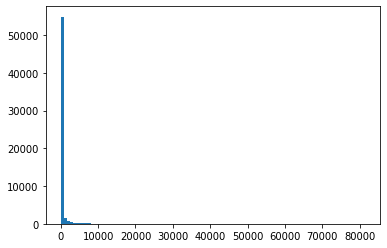

In [102]:
plt.hist(ml.groupby('item')['user'].count().sort_values(ascending=False), bins=100)
plt.show()

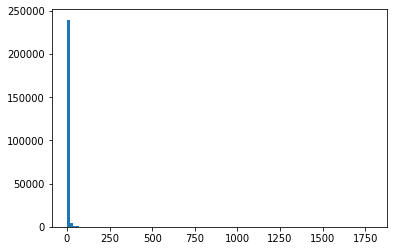

In [96]:
plt.hist(am.groupby('item_id')['user_id'].count().sort_values(ascending=False), bins=100)
plt.show()

rows  1058788 
#ratings/user 8.72 
#ratings/item 4.28 
average rating 4.28 
#users  121372 
#items  247465 
sparse  0.99996


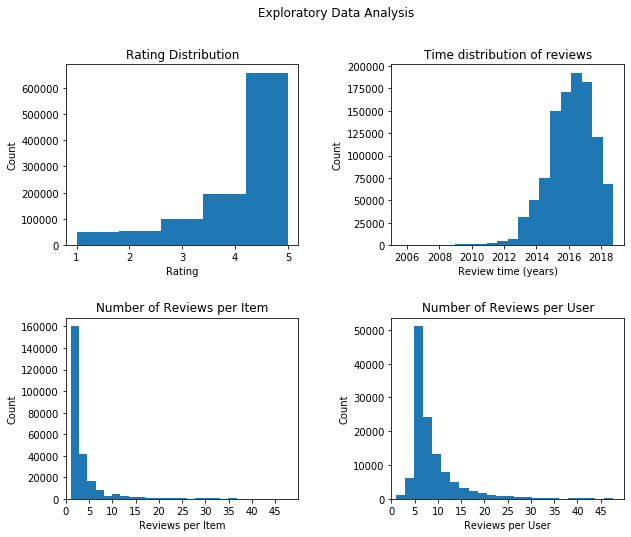

In [90]:
eda_plots(am, title='Exploratory Data Analysis', size=(10,8))

# Other Splits

## Leave item out

In [ ]:
def leave_x_out(full_data, leave_out):
    # Input: data must be formatted by func: tranfsorm
    # Output: full_data = without all entries in leave one out set
    #         leave_one_out_set = data with one user and one item from full_data
    
    full_data['index'] = full_data.index
    user_items_ind = full_data.groupby('user_id')['index'].apply(list)
    index_to_drop = []
    
    for indices in user_items_ind:
        if len(indices) > leave_out:
            for to_leave_out in range(leave_out):
                index = indices[- to_leave_out]
                index_to_drop.append(index)
    
    leave_one_out_set = full_data.loc[index_to_drop]
    full_data_leave_one_out = full_data.drop(index_to_drop)
    
    return full_data_leave_one_out.drop(columns=['index']), leave_one_out_set.drop(columns=['index'])

---
## Setting rating threshold of 3 and above for a 1

In [ ]:
# user_thres = 5

In [ ]:
# df['#ratings'] = df.groupby('user')['user'].transform('count')
# df = df[df['#ratings'] >= user_thres].drop(columns=['#ratings'])

In [ ]:
df_upper = df[df['user_rating_counts'] > median].copy()
df_lower = df[df['user_rating_counts'] <= median].copy()

In [ ]:
df_lower = df_lower.drop(columns=['user_rating_counts'])

In [ ]:
df

In [ ]:
pd.read_pickle(path + data_path + 'Amazon_lo_all_users_4m')

In [ ]:
renames = {'datetime':'date'}
df = df.rename(renames)

In [ ]:
df = df[['user', 'item', 'datetime', 'rating']]
df.to_pickle(path + data_path + 'Amazon_10m')

In [ ]:
df_lower.to_pickle(path + data_path + 'Amazon/Amazon_lo_all_users_4m')
df_upper.to_pickle(path + data_path + 'Amazon/Amazon_up_all_users_6_5m')

In [ ]:
df = df_og

In [ ]:
df['datetime'] = pd.to_datetime(df['unixReviewTime'], unit='s')
df = df.drop(columns=['unixReviewTime'])

In [ ]:
df = df.drop(columns=['user_rating_counts'])

In [ ]:
df = df[df['verified']==True]

In [ ]:
df = df.drop(columns=['verified'])

In [ ]:
df = df_upper

In [ ]:
df.to_pickle(path + data_path + 'Amazon/Amazon_10m')

In [ ]:
median = user_ratings.median()
median

In [ ]:
df['user_rating_counts'] = df.groupby('user')['rating'].transform('count')
user_ratings = df.groupby('user')['rating'].count()
item_ratings = df.groupby('item')['rating'].count()
norpu = user_ratings.mean()
norpi = item_ratings.mean()
total_users = df.user.unique().size
total_items = df.item.unique().size
sparseness = 1 - len(df) / (len(df['user'].unique()) * len(df['item'].unique()))

In [ ]:
print('rows ', len(df), '\n#ratings', len(df[df['rating'] != 0]), '\n#ratings/user', round(norpu,2), '\n#ratings/item', round(norpi,2), '\naverage rating', "{0:.2f}".format(np.average(df['rating'])), '\n#users ', df['user'].unique().size, '\n#items ', df['item'].unique().size, '\nsparse ', round(sparseness,5), '%')

df.hist(column='rating', bins=5, grid=False)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.xticks(range(1,6))
plt.savefig('Plots/Deliverables/rating_dist_ml')
plt.show()

plt.hist(item_ratings, bins = 1000)
plt.xlim([0,100])
plt.title('#ratings per item distribution (1000 bins)')
plt.xlabel('Items')
plt.ylabel('Count')
plt.savefig('Plots/Deliverables/#ratings_per_item_dist_ml')
plt.show()

plt.hist(user_ratings, bins = 1000)
plt.xlim([0,30])
plt.title('#ratings per user distribution (1000 bins)')
plt.xlabel('Users')
plt.ylabel('Count')
plt.savefig('Plots/Deliverables/#ratings_per_user_dist_ml')
plt.show()

# Data Prep
Create new ids for users and items that match the row and column indices of the user-item interaction matrix

In [ ]:
df_lower['item_id'] = df_lower.item.astype('category').cat.codes
df_lower['user_id'] = df_lower.user.astype('category').cat.codes

## Leave item out train test split

In [ ]:
def leave_x_out(full_data, leave_out):
    # Input: data must be formatted by func: tranfsorm
    # Output: full_data = without all entries in leave one out set
    #         leave_one_out_set = data with one user and one item from full_data
    
    full_data['index'] = full_data.index
    user_items_ind = full_data.groupby('user_id')['index'].apply(list)
    index_to_drop = []
    
    for indices in user_items_ind:
        if len(indices) > leave_out:
            for to_leave_out in range(leave_out):
                index = indices[- to_leave_out]
                index_to_drop.append(index)
    
    leave_one_out_set = full_data.loc[index_to_drop]
    full_data_leave_one_out = full_data.drop(index_to_drop)
    
    return full_data_leave_one_out.drop(columns=['index']), leave_one_out_set.drop(columns=['index'])

In [ ]:
def create_matrices(data, n_users, n_items):
        r = data['user_id']
        c = data['item_id']
        d = data['rating']
        m = sparse.csr_matrix((d, (r, c)), shape=(n_users, n_items))
        m_ones = m.copy()
        m_ones[m_ones > 0] = 1
                               
        return m, m_ones

In [ ]:
train_set, test_set = leave_x_out(df_new_ids, 2)
val_set, test_set = leave_x_out(test_set, 1)

## Leave users out 

In [ ]:
def leave_users_out(full_data, leave_out):
    full_data['index'] = full_data.index
    user_index_df = full_data.groupby('user_id')['index'].apply(list)
    users = np.random.choice(list(user_index_df.index), leave_out, replace=False)
    users_indices = []
    
    for user in users:
        users_indices.extend(user_index_df.loc[user])
    
    sub_set = full_data.loc[users_indices]
    remaining = full_data.drop(users_indices)
    
    return remaining.drop(columns=['index']), sub_set.drop(columns=['index'])

In [ ]:
half_users = int(len(df_lower.user.unique())/2)
quarter_users = int(half_users/2)

In [ ]:
quarter_users

In [ ]:
leftovers, lower_half_users = leave_users_out(df_lower, half_users)

In [ ]:
leftovers, lower_quarter_users = leave_users_out(df_lower, quarter_users)

In [ ]:
lower_quarter_users

In [ ]:
len(lower_quarter_users.user_id.unique())

In [ ]:
lower_half_users.to_pickle(path + data_path + 'Amazon/Amazon_lo_half_users')

In [ ]:
lower_quarter_users.to_pickle(path + data_path + 'Amazon/Amazon_lo_quarter_users')

In [ ]:
df_upper['item_id'] = df_upper.item.astype('category').cat.codes
df_upper['user_id'] = df_upper.user.astype('category').cat.codes

half_users = int(len(df_upper.user.unique())/2)
quarter_users = int(half_users/2)

quarter_users

leftovers, upper_half_users = leave_users_out(df_upper, half_users)

leftovers, upper_quarter_users = leave_users_out(df_upper, quarter_users)

upper_quarter_users

len(upper_quarter_users.user_id.unique())



In [ ]:
upper_half_users.to_pickle(path + data_path + 'Amazon/Amazon_up_half_users')

upper_quarter_users.to_pickle(path + data_path + 'Amazon/Amazon_up_quarter_users')